# Text and annotation

/Users/suryasingh/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:91: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


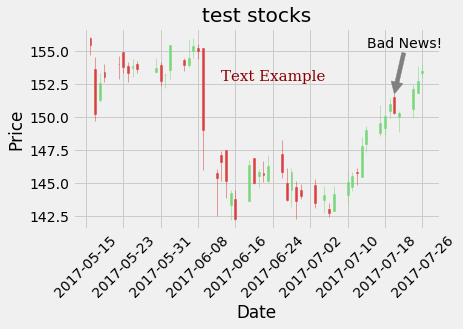

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

    
def graph_data(stock):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    source_code = open(stock,'r').read()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'Open' not in line and 'Volume' not in line:
                stock_data.append(line)
    date, openp, highp, lowp, closep, adjclose, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    x = 0
    y = 50#len(date)
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('test stocks')
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    
    font_dict = {'family':'serif',
                 'color':'darkred',
                 'size':15}
    ax1.text(date[30], closep[1],'Text Example', fontdict=font_dict)
    ax1.annotate('Bad News!',(date[4],highp[4]),
                 xytext=(0.8, 0.9), textcoords='axes fraction',
                 arrowprops = dict(facecolor='grey',color='grey'))
    plt.show()
    
    
    
graph_data('yahoo_finance_replacement.csv')


# Subplot - Method 1

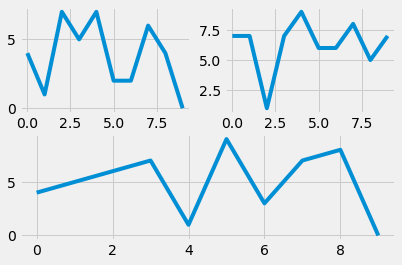

In [49]:
import random
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()

def create_plots():
    xs = []
    ys = []

    for i in range(10):
        x = i
        y = random.randrange(10)

        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)
x,y = create_plots()
ax1.plot(x,y)
x,y = create_plots()
ax2.plot(x,y)
x,y = create_plots()
ax3.plot(x,y)
plt.show()

# Method - 2

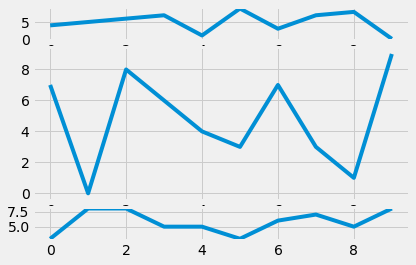

In [50]:
style.use('fivethirtyeight')
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
ax1.plot(x,y)
x,y = create_plots()
ax2.plot(x,y)
x,y = create_plots()
ax3.plot(x,y)
plt.show()